In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek 
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
import pickle
from pickle import dump
from pickle import load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
def normalization(text):
    # transform text into lowercase
    text = text.lower()
    
    # remove the punctuation and special characters 
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # remove digits
    text = re.sub(r'[\d+]', '', text)
    
    # remove greeks
    text = (re.sub('(?![ -~]).', '', text))
    
    return text
    
def tokenization(text):
    # split the text into a series of tokens
    text = word_tokenize(text)
    
    return text

In [3]:
def removedStopwords(text):
    
    # initialize an empty list of tokens with no stopwords
    tokens_with_no_stopwords = list()
    
    # extract tokens not found in a list of stopwords 
    for word in text:
        if word not in stopwords.words('english'):
            tokens_with_no_stopwords.append(word)
    
    return tokens_with_no_stopwords
    
def removed_words_less_than_4_characters(text):
    # initialize an empty list for tokens with more than 4 characters
    tokens_with_more_than_4_characters = list()
    
    # extract tokens with more than 4 characters
    for word in text:
        if len(word) >= 4:
            tokens_with_more_than_4_characters.append(word)
            
    return tokens_with_more_than_4_characters

In [4]:
def wordsLemmatization(text):
    # define object for lemmatizer 
    lemmatizer = WordNetLemmatizer()
    
    # initialize an empty list for lemmatized words
    wordsLemmatize = list()
    
    # lemmatize the words
    for word in text:
        wordsLemmatize.append(lemmatizer.lemmatize(word))
    
    return wordsLemmatize

In [5]:
def sentence_reconstruction(text):
    # initialize an emppty string 
    sentence_reconstruction = ""
    
    # combine each token to form a string 
    for word in text:
        sentence_reconstruction = sentence_reconstruction + word + " "
    return sentence_reconstruction 

In [6]:
def text_subjectivity(text):
    text_ = TextBlob(text)
    return text_.sentiment.subjectivity

In [7]:
def text_polarity(text):
    text_ = TextBlob(text)
    return text_.sentiment.polarity

In [8]:
def sentiment_analysis_outcome(polarity):
    if polarity > 0:
        return "Positive"
    else:
        return "Negative"

In [10]:
df = pd.read_csv('movie.csv')
df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [11]:
# Checking the size of dataset
df.shape

(40000, 2)

In [13]:
#Summarizing the overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [14]:
#Checking the null values in dataset
df.isnull().sum()

text     0
label    0
dtype: int64

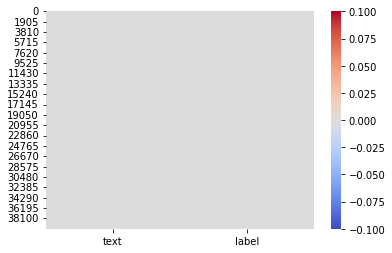

In [15]:
sns.heatmap(df.isnull(), annot = False, cmap = 'coolwarm')

In [16]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [17]:
#Checking the null values in dataset
df.isnull().sum()

text     0
label    0
dtype: int64

In [20]:
df['text'] = df['text'].apply(normalization)

In [21]:
df['text'] = df['text'].apply(tokenization)

In [22]:
df['text'] = df['text'].apply(removedStopwords)

In [23]:
df['text'] = df['text'].apply(removed_words_less_than_4_characters)

In [24]:
df['text'] = df['text'].apply(wordsLemmatization)

In [25]:
df['text'] = df['text'].apply(sentence_reconstruction)

In [26]:
df_sujectivity = df['text'].apply(text_subjectivity)
# create a new column in coronavirus dataframe for subjectivity
df['subjectivity'] = df_sujectivity

In [27]:
df_polarity = df['text'].apply(text_polarity)
# create a new column in coronavirus dataframe for polarity
df['polarity'] = df_polarity

In [29]:
df['sentiment_analysis'] = df_polarity.apply(sentiment_analysis_outcome)

In [30]:
df['sentiment_analysis'].value_counts()

Positive    30376
Negative     9624
Name: sentiment_analysis, dtype: int64

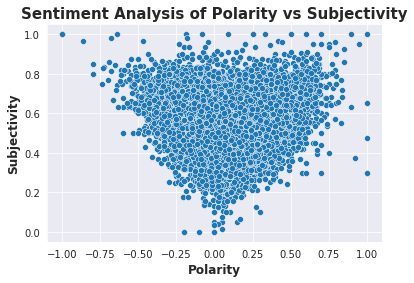

In [32]:
sns.set_style("darkgrid")
sns.scatterplot(x = df_polarity, y = df_sujectivity)
plt.title("Sentiment Analysis of Polarity vs Subjectivity", fontweight = 'bold', fontsize = 15)
plt.xlabel("Polarity", fontweight = 'bold', fontsize = 12)
plt.ylabel("Subjectivity", fontweight = 'bold', fontsize = 12)
plt.show()

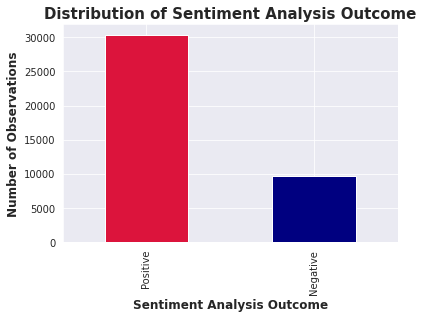

In [33]:
sns.set_style("darkgrid")
df['sentiment_analysis'].value_counts().plot(kind = "bar", color = ["crimson", "navy"])
plt.title("Distribution of Sentiment Analysis Outcome", fontsize = 15, fontweight = 'bold')
plt.xlabel("Sentiment Analysis Outcome", fontsize = 12, fontweight = 'bold')
plt.ylabel("Number of Observations", fontsize = 12, fontweight = 'bold')
plt.show()

### **Modelling**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                    df['sentiment_analysis'],
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [37]:
steps = [('tfidfVectorizer', TfidfVectorizer(analyzer = 'word')), 
             ('smt', SMOTETomek(random_state = 42)),
             ('svm', SVC(kernel = "linear", random_state = 42))]

In [38]:
model_svm = Pipeline(steps = steps)

In [39]:
model_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidfVectorizer', TfidfVectorizer()),
                ('smt', SMOTETomek(random_state=42)),
                ('svm', SVC(kernel='linear', random_state=42))])

In [40]:
y_pred_train_svm = model_svm.predict(X_train)
y_pred_test_svm = model_svm.predict(X_test)

In [41]:
print("Classification Report for Support Vector Machine (SVM) with Training Set: ")
print(classification_report(y_train, y_pred_train_svm))
print()
print("Classification Report for Support Vector Machine (SVM) with Testing Set:")
print(classification_report(y_test, y_pred_test_svm))

Classification Report for Support Vector Machine (SVM) with Training Set: 
              precision    recall  f1-score   support

    Negative       0.96      0.99      0.97      7224
    Positive       1.00      0.99      0.99     22776

    accuracy                           0.99     30000
   macro avg       0.98      0.99      0.98     30000
weighted avg       0.99      0.99      0.99     30000


Classification Report for Support Vector Machine (SVM) with Testing Set:
              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83      2400
    Positive       0.95      0.94      0.95      7600

    accuracy                           0.92     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.92      0.92      0.92     10000



Text(33.0, 0.5, 'Predicted')

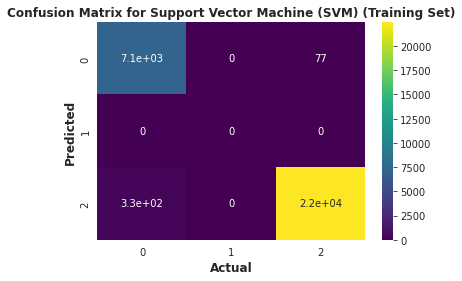

In [42]:
conf_matrix = confusion_matrix(y_train, y_pred_train_svm, labels = ['Negative', 'Neutral', 'Positive'])
sns.heatmap(conf_matrix, annot = True, cmap = 'viridis')
plt.title("Confusion Matrix for Support Vector Machine (SVM) (Training Set)", fontweight = 'bold', fontsize = 12)
plt.xlabel("Actual", fontweight = 'bold', fontsize = 12)
plt.ylabel("Predicted", fontweight = 'bold', fontsize = 12)

Text(33.0, 0.5, 'Predicted')

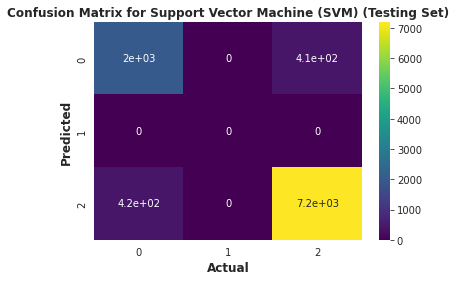

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_test_svm, labels = ['Negative', 'Neutral', 'Positive'])
sns.heatmap(conf_matrix, annot = True, cmap = 'viridis')
plt.title("Confusion Matrix for Support Vector Machine (SVM) (Testing Set)", fontweight = 'bold', fontsize = 12)
plt.xlabel("Actual", fontweight = 'bold', fontsize = 12)
plt.ylabel("Predicted", fontweight = 'bold', fontsize = 12)

In [44]:
print("Performance Metrics for Support Vector Machine (SVM) (Training Set):")
print("Accuracy Score: ", accuracy_score(y_train, y_pred_train_svm))
print("Precision Score: ", precision_score(y_train, y_pred_train_svm, average = 'weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_svm, average = "weighted"))
print("Recall Score: ", recall_score(y_train, y_pred_train_svm, average = "weighted"))
print()
print("Performance Metrics for Support Vector Machine (SVM) (Testing Set):")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test_svm))
print("Precision Score: ", precision_score(y_test, y_pred_test_svm, average = 'weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_svm, average = "weighted"))
print("Recall Score: ", recall_score(y_test, y_pred_test_svm, average = "weighted"))

Performance Metrics for Support Vector Machine (SVM) (Training Set):
Accuracy Score:  0.9863333333333333
Precision Score:  0.9866840493536345
F1 Score:  0.9864136831881136
Recall Score:  0.9863333333333333

Performance Metrics for Support Vector Machine (SVM) (Testing Set):
Accuracy Score:  0.9173
Precision Score:  0.917432027265117
F1 Score:  0.9173645977403349
Recall Score:  0.9173


In [46]:
#Saving the model to file
dump(model_svm, open('IMDb_svm.pkl', 'wb'))

In [47]:
#Loading the file
ml = load(open('IMDb_svm.pkl', 'rb'))